## Imports

In [174]:
import pygad
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import numpy as np
import time
import pandas as pd
from functools import partial
import matplotlib.pyplot as plt
import random

## Creation of Datasets
We use the datasets of the companies in which we are going to invest and create 5 new datasets to run our program

In [177]:
companies = np.arange(1, 56)

### Expected Close Prices

In [180]:
dataset_path = 'Final-Predictions.csv'
close_prices_exp = pd.read_csv(dataset_path)
close_prices_exp = close_prices_exp.drop(columns=['Date'])
close_prices_exp.head()

,GOOGL,GOOG,META,FOXA,FOX,AMZN,EBAY,F,TPR,DECK,...,PSA,SPG,MAA,UDR,CSGP,AES,NEE,PPL,CNP,NRG
0,135.978,137.125,339.780,29.367,27.367,153.308,43.017,11.560,36.414,111.997,...,297.210,138.802,129.030,37.013,87.578,18.559,59.395,26.577,27.718,48.075
1,136.113,136.361,335.113,29.258,27.083,152.222,42.922,11.363,35.843,109.759,...,295.253,137.909,128.844,36.513,87.181,18.516,58.617,26.383,27.799,47.858
2,134.073,134.912,330.401,29.884,27.760,149.541,43.197,11.332,37.642,110.388,...,307.272,137.493,130.144,36.861,84.674,18.635,59.736,26.834,28.316,47.848
3,135.551,136.157,327.151,29.581,27.689,149.244,42.897,10.852,35.767,109.917,...,290.105,132.731,126.859,35.930,81.706,18.214,60.115,26.915,28.328,48.288
4,131.783,134.013,330.548,29.677,27.556,143.460,41.792,10.955,36.101,108.778,...,289.111,134.205,127.090,36.402,80.815,18.316,60.045,26.843,28.382,48.464


### Open Prices Dataset

In [183]:
dataset_path = 'Stocks-Open-Prices.csv'
open_prices = pd.read_csv(dataset_path)
open_prices = open_prices.drop(columns=['Date'])
open_prices.head()

,GOOGL_Open,GOOG_Open,META_Open,FOXA_Open,FOX_Open,AMZN_Open,EBAY_Open,F_Open,TPR_Open,DECK_Open,...,PSA_Open,SPG_Open,MAA_Open,UDR_Open,CSGP_Open,AES_Open,NEE_Open,PPL_Open,CNP_Open,NRG_Open
0,138.207771,139.258020,350.265388,29.210862,27.322692,151.539993,42.614953,11.252438,35.935504,110.808334,...,296.042341,136.615494,127.976370,36.641264,86.870003,18.384008,58.836711,26.286978,27.717489,50.325069
1,136.910985,138.260461,343.944422,29.683435,27.529161,149.199997,42.979444,11.233747,36.784836,112.438332,...,300.070863,136.230598,129.193560,36.708350,85.250000,18.355195,59.380865,26.773774,28.203422,50.178489
2,138.078085,139.507407,343.465873,29.762197,27.558655,145.589996,42.880929,10.990754,36.062416,112.158333,...,293.324313,134.748776,126.184148,36.056609,82.370003,18.335984,60.410876,27.017174,28.426947,50.686620
3,136.412230,138.013070,345.948391,29.604673,27.519329,144.690002,41.895841,10.887949,35.915981,112.411667,...,290.227693,134.277310,125.752878,35.979936,81.120003,18.057436,59.905588,26.783510,28.213139,50.217573
4,135.953351,137.661914,353.635270,29.634209,27.627478,146.740005,42.339133,11.074867,36.404103,110.016670,...,289.150217,135.595538,125.867889,36.181206,82.300003,17.951781,60.031910,27.036646,28.368636,50.706170


### Close Prices Dataset

In [186]:
dataset_path = 'Stocks-Closing-Prices.csv'
close_prices = pd.read_csv(dataset_path)
close_prices = close_prices.drop(columns=['Date'])
close_prices.head()

,GOOGL_Close,GOOG_Close,META_Close,FOXA_Close,FOX_Close,AMZN_Close,EBAY_Close,F_Close,TPR_Close,DECK_Close,...,PSA_Close,SPG_Close,MAA_Close,UDR_Close,CSGP_Close,AES_Close,NEE_Close,PPL_Close,CNP_Close,NRG_Close
0,137.828705,139.218109,345.250488,29.772041,27.666805,149.929993,43.215858,11.364589,37.263191,112.330002,...,302.701508,137.625824,130.190292,37.034225,85.459999,18.576109,59.827850,26.783510,28.193701,50.080772
1,138.576859,140.016144,343.435944,29.535757,27.499664,148.470001,42.900635,10.944024,35.974552,113.056664,...,294.139740,134.796890,126.701691,36.094948,82.769997,18.182304,60.235966,26.929548,28.310326,50.491188
2,136.053101,137.701828,346.078003,29.594828,27.519327,144.570007,41.895840,10.915987,36.023369,112.036667,...,291.392548,134.960464,126.663353,36.286636,81.419998,18.124674,60.051346,26.890608,28.261730,50.119854
3,135.394745,137.053421,350.893524,29.673590,27.627480,145.240005,42.151966,11.074867,36.443153,108.714996,...,289.868500,135.335739,126.299164,36.248299,81.339996,18.057436,60.323421,27.017172,28.417229,50.549816
4,138.497055,140.185715,357.583374,30.077244,28.001087,149.100006,42.201221,11.187017,37.185097,114.123337,...,291.334351,136.923401,127.938057,36.986298,82.900002,18.316771,61.139652,27.250835,28.582445,51.048187


### Volatility Dataset

In [189]:
dataset_path = 'Stocks-Volatility.csv'
volatility = pd.read_csv(dataset_path)
volatility = volatility.drop(columns=['Date'])
volatility.head()

,GOOGL_Volatility,GOOG_Volatility,META_Volatility,FOXA_Volatility,FOX_Volatility,AMZN_Volatility,EBAY_Volatility,F_Volatility,TPR_Volatility,DECK_Volatility,...,PSA_Volatility,SPG_Volatility,MAA_Volatility,UDR_Volatility,CSGP_Volatility,AES_Volatility,NEE_Volatility,PPL_Volatility,CNP_Volatility,NRG_Volatility
0,0.023369,0.023706,0.027976,0.019350,0.015006,0.013903,0.019204,0.058000,0.024148,0.047605,...,0.043977,0.032929,0.027421,0.035201,0.022773,0.027676,0.033884,0.014931,0.030755,0.027229
1,0.026700,0.027219,0.029616,0.018105,0.014433,0.014222,0.018569,0.051283,0.028830,0.051746,...,0.040039,0.035785,0.025439,0.031233,0.027510,0.029729,0.030644,0.015560,0.031748,0.027341
2,0.027004,0.027723,0.031610,0.017129,0.014704,0.018416,0.019233,0.044937,0.030493,0.056579,...,0.037601,0.038757,0.024935,0.028883,0.031368,0.033375,0.026371,0.016943,0.032214,0.027287
3,0.026710,0.027654,0.033809,0.016819,0.016209,0.018989,0.018554,0.040176,0.031394,0.063477,...,0.035559,0.043366,0.026446,0.028151,0.034476,0.037155,0.026770,0.016353,0.032322,0.027575
4,0.026497,0.027354,0.035549,0.018695,0.019314,0.019508,0.019152,0.037869,0.032380,0.065643,...,0.033955,0.047581,0.026545,0.025860,0.034556,0.040171,0.026718,0.016926,0.031322,0.027973


## Inicial values
The inicial value that we have to invest is 10000$, the number of companies in which we are going to invest is 3 and the daily risk-free rate for the stock market in January 2024 is aproximatelly 0.00959

In [527]:
current_value = 10000
n_comp = 55
risk_free_rate = 0.00959
values = [current_value]
returns = []
risk_returns = []

In [529]:
def value(n_comp, initial_value, stocks, investment, close_prices):
    current_value = initial_value - investment
    for i in range(n_comp):
        current_value += stocks[i]*close_prices[i]
    return current_value

## Financial Metrics

### Invested Money in a day

In [533]:
def invested(n_comp, stocks, open_prices):
    inv = 0
    for i in range(n_comp):
        inv += stocks[i]*open_prices[i]
    op = np.count_nonzero(stocks)
    inv += op*2 # Operation cost
    print(f"Operation cost: {op*2}")
    return inv     

### Total Return
It measures the total return of an investment

In [536]:
def TR(ending_value, starting_value):
    return ((ending_value - starting_value)/starting_value)*100

### Return on Investment  
It measures the percentage return on an investment

In [539]:
def ROI(investment, earnings):
    return ((earnings - investment)/investment)*100

### Risk-Adjusted Return  
Performance of an investment given the Risk taken

In [542]:
def RAR (avg_return, risk_free_rate, avg_vol):
    return (avg_return-risk_free_rate)/avg_vol

## Genetic Model
We created a genetic model to that adjust the number os stocks that we buy for each company, based on the expected returns of each company for that day. If a return is expected to be negative, the weght is automatically 0, else it can be a value in the range of 0 to 10. If the value invested is negative or above budget the return of the fitness function is -infinite, so that the model does't develop those values

In [545]:
def fitness_func(ga_instance, solution, sol_idx):
    global close_prices_exp, open_prices, current_value, day
    
    exp_prices = close_prices_exp.iloc[day].values 
    
    prices = open_prices.iloc[day].values
    
    weights = np.array(solution, dtype=int)

    invested = 0
    gains = 0
    n_stocks = 0
    
    for i in range(n_comp):
        if (exp_prices[i]-prices[i] < 0):
            weights[i] = 0
        if (weights[i] != 0):
            n_stocks += 1
        invested += weights[i] * prices[i]
        gains += weights[i]*(exp_prices[i]-prices[i])

    op = np.count_nonzero(weights)
    invested += op*2 # Operation cost
    gains -= op*2
    if invested < 0 or invested > current_value or n_stocks > 20:
        return -np.inf

    ga_instance.best_weights = weights
        
    return gains

The model is initialized with weights zero for companies with expected return negative or volatility below 0.030. In a day we invest in a maximum of 5 companies and 20 stocks per company. The model does 50 iterations to analyse the best options of stocks to buy and sell in that day

In [547]:
def daily_investment ():

    global n_comp, inicial_value, current_value, close_prices_exp, open_prices, close_prices, volatility, values, returns, risk_returns
    
    def on_generation(ga_instance):
        print(f"Generation {ga_instance.generations_completed} complete") 
        print(f"Fitness of the best solution: {ga_instance.best_solution()[1]}")
        time.sleep(1)

    exp_prices = close_prices_exp.iloc[day].values 
    prices = open_prices.iloc[day].values
    vol = volatility.iloc[day].values
    
    indices = []
    for i in range (n_comp):
        if (exp_prices[i] - prices[i] > 0 and vol[i] < 0.030):
            indices.append(i)

    indices = random.sample(indices, min(5, len(indices)))
    gene_space = [{'low': 0.00, 'high': 20.00} if i in indices else {'low': 0.00, 'high': 0.00} for i in range(n_comp)]
        
    ga_instance = pygad.GA(
    num_generations=50, #Number of iterations of the genetic model
    num_parents_mating=5,
    fitness_func=fitness_func,
    sol_per_pop=10,
    num_genes=55, #Number of copanies to analyse
    gene_type=float,
    init_range_low=0.00, #Minimum number of stocks bought of a company
    init_range_high=20.00, #Maximum number of stocks bought of a company
    gene_space=gene_space,
    parent_selection_type="sss",
    keep_parents=2,
    crossover_type="single_point",
    mutation_type="random",
    mutation_percent_genes=100, #Percentage of the weights that can be altered at each iteraction
    on_generation=on_generation
    )

    fitness_function = partial(fitness_func, ga_instance=ga_instance)
    
    ga_instance.run()

    ga_instance.plot_fitness()

    print(f"Day: {day}")
    initial_value = current_value
    solution = ga_instance.best_weights
    investment = invested(n_comp, solution, prices)
    current_value = value(n_comp, initial_value, solution, investment, close_prices.iloc[day].values)
    total_returns = TR(current_value, initial_value)
    print(f"Inicial value: {initial_value}")
    print(f"Current value: {current_value}")
    print(f"Actions Investment: {solution}")
    print(f"Invested Money: {investment:.2f}")
    print(f"Total Return: {total_returns:.2f}%")
    ret_on_inv = ROI(investment, investment+current_value-initial_value)
    risk_ret = RAR(total_returns, risk_free_rate, np.mean(vol))
    print(f"Return on Investment: {ret_on_inv:.2f}%")
    print(f"Risk-Adjusted Return: {risk_ret:.2f}%")
    print()
    values.append(current_value)
    returns.append(ret_on_inv)
    risk_returns.append(risk_ret)

## Investments
For the days in January that the market is open, we use the model and our preditions of the daily returns to invest in a stock when the market opens and sell it when the market closes. Then we measure several metrics to evaluate our investmentes (inicial value of the day, current value, money invested, total return, return on investment and risk-adjusted return

C:\Users\Utilizador\anaconda3\Lib\site-packages\pygad\pygad.py:1139: UserWarning: The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.
  warnings.warn("The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.")


Generation 1 complete
Fitness of the best solution: 47.798505467305674
Generation 2 complete
Fitness of the best solution: 47.97349766871092
Generation 3 complete
Fitness of the best solution: 49.44350929861527
Generation 4 complete
Fitness of the best solution: 49.44350929861527
Generation 5 complete
Fitness of the best solution: 50.49713968468191
Generation 6 complete
Fitness of the best solution: 51.95526347886046
Generation 7 complete
Fitness of the best solution: 52.66276885004544
Generation 8 complete
Fitness of the best solution: 52.66276885004544
Generation 9 complete
Fitness of the best solution: 52.66276885004544
Generation 10 complete
Fitness of the best solution: 52.966272695351506
Generation 11 complete
Fitness of the best solution: 52.966272695351506
Generation 12 complete
Fitness of the best solution: 54.02425435157997
Generation 13 complete
Fitness of the best solution: 54.557259403592695
Generation 14 complete
Fitness of the best solution: 54.557259403592695
Generation

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


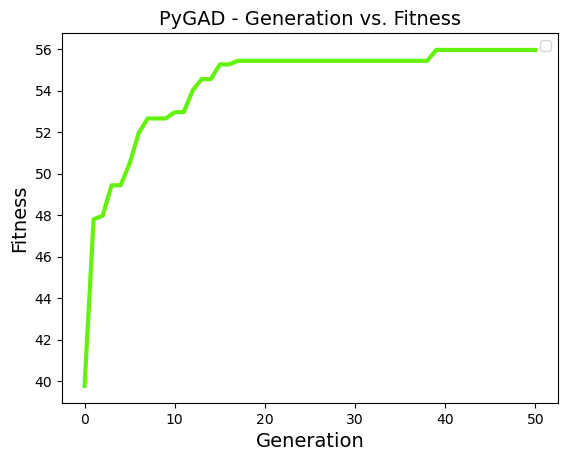

Day: 0
Operation cost: 10
Inicial value: 10000
Current value: 10037.73178042643
Actions Investment: [ 0  0  0  0  0  0  0  0 19  0  0  0  0  0  0  0  0  0  0  0  0  0 18  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 18
  0 17 12  0  0  0  0]
Invested Money: 5795.71
Total Return: 0.38%
Return on Investment: 0.65%
Risk-Adjusted Return: 11.14%

Generation 1 complete
Fitness of the best solution: 319.0556119721001
Generation 2 complete
Fitness of the best solution: 319.0556119721001
Generation 3 complete
Fitness of the best solution: 324.90209898475536
Generation 4 complete
Fitness of the best solution: 324.90209898475536
Generation 5 complete
Fitness of the best solution: 332.6795859974106
Generation 6 complete
Fitness of the best solution: 332.6795859974106
Generation 7 complete
Fitness of the best solution: 332.6795859974106
Generation 8 complete
Fitness of the best solution: 335.8092089604888
Generation 9 complete
Fitness of the best solution: 335.80920896048

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


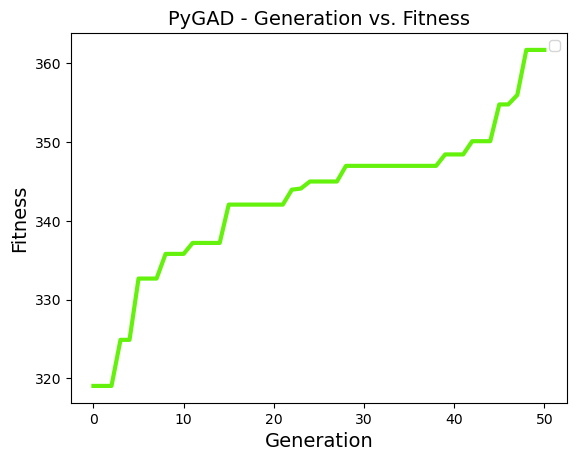

Day: 1
Operation cost: 10
Inicial value: 10037.73178042643
Current value: 9943.870396579094
Actions Investment: [ 0  0  0  0  0  7  0  0  0  0  0  0  0  0  0  0  0  0  0  2  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0 16  0  0  0  0 19  0  0  0  0  0  0
  0  1  0  0  0  0  0]
Invested Money: 9912.94
Total Return: -0.94%
Return on Investment: -0.95%
Risk-Adjusted Return: -28.28%

Generation 1 complete
Fitness of the best solution: 133.04918343155953
Generation 2 complete
Fitness of the best solution: 133.7790311425273
Generation 3 complete
Fitness of the best solution: 142.02329606786475
Generation 4 complete
Fitness of the best solution: 142.78152075185858
Generation 5 complete
Fitness of the best solution: 142.78152075185858
Generation 6 complete
Fitness of the best solution: 142.9939527227267
Generation 7 complete
Fitness of the best solution: 142.9939527227267
Generation 8 complete
Fitness of the best solution: 142.9939527227267
Generation 9 complete
Fitness of the best solution

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


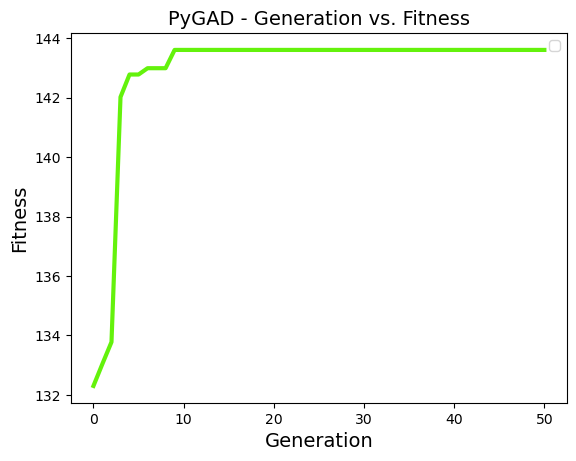

Day: 2
Operation cost: 8
Inicial value: 9943.870396579094
Current value: 10118.962064722293
Actions Investment: [ 0  0  0  0 19  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 15  0  0
  0  0  0  0  0  0  1  0  0  0  4  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0]
Invested Money: 9067.11
Total Return: 1.76%
Return on Investment: 1.93%
Risk-Adjusted Return: 52.52%

Generation 1 complete
Fitness of the best solution: 46.612101747993655
Generation 2 complete
Fitness of the best solution: 46.612101747993655
Generation 3 complete
Fitness of the best solution: 46.87618198909601
Generation 4 complete
Fitness of the best solution: 47.50898676709218
Generation 5 complete
Fitness of the best solution: 47.50898676709218
Generation 6 complete
Fitness of the best solution: 47.51414363495663
Generation 7 complete
Fitness of the best solution: 48.040103412222116
Generation 8 complete
Fitness of the best solution: 48.040103412222116
Generation 9 complete
Fitness of the best solution: 4

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


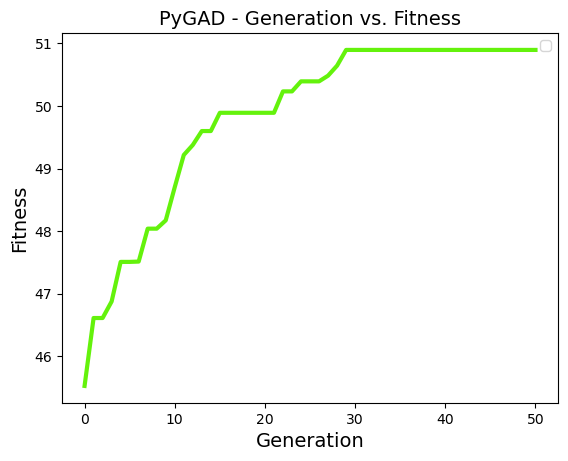

Day: 3
Operation cost: 10
Inicial value: 10118.962064722293
Current value: 10098.201822765654
Actions Investment: [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0 19 17  0  0  0 18  0  0  0  0
  0  0  0  0  0  0  0  0 19  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0 18  0  0]
Invested Money: 5852.86
Total Return: -0.21%
Return on Investment: -0.35%
Risk-Adjusted Return: -6.40%

Generation 1 complete
Fitness of the best solution: 263.55883919163193
Generation 2 complete
Fitness of the best solution: 284.0349240370394
Generation 3 complete
Fitness of the best solution: 284.35224112325426
Generation 4 complete
Fitness of the best solution: 284.35224112325426
Generation 5 complete
Fitness of the best solution: 303.4615381865901
Generation 6 complete
Fitness of the best solution: 323.2690268326412
Generation 7 complete
Fitness of the best solution: 323.2690268326412
Generation 8 complete
Fitness of the best solution: 323.6195188432714
Generation 9 complete
Fitness of the best solution

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


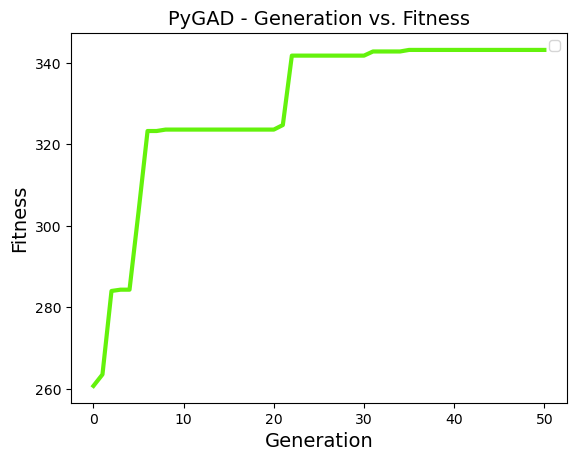

Day: 4
Operation cost: 8
Inicial value: 10098.201822765654
Current value: 10127.420988125681
Actions Investment: [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 15  0  0
  0  0  0  0  0  0  0  0  4  0  2  0  0  0  0  0  0  0  0  0 12  0  0  0
  0  0  0  0  0  0  0]
Invested Money: 9091.23
Total Return: 0.29%
Return on Investment: 0.32%
Risk-Adjusted Return: 8.30%

Generation 1 complete
Fitness of the best solution: 20.080341292922032
Generation 2 complete
Fitness of the best solution: 22.31008918185617
Generation 3 complete
Fitness of the best solution: 22.31008918185617
Generation 4 complete
Fitness of the best solution: 22.31008918185617
Generation 5 complete
Fitness of the best solution: 23.852222734579946
Generation 6 complete
Fitness of the best solution: 24.436527243003184
Generation 7 complete
Fitness of the best solution: 25.048108475344414
Generation 8 complete
Fitness of the best solution: 25.048108475344414
Generation 9 complete
Fitness of the best solution: 

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


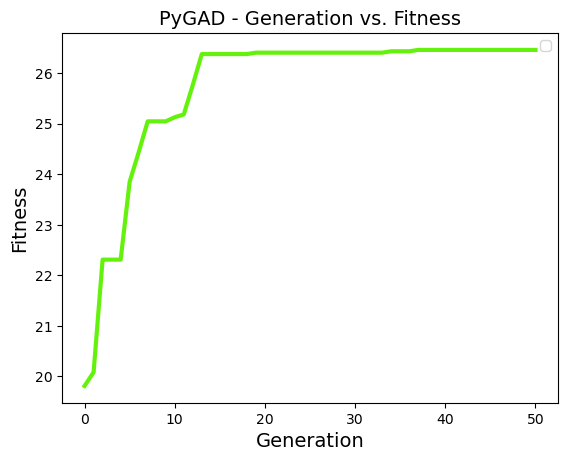

Day: 5
Operation cost: 10
Inicial value: 10127.420988125681
Current value: 10103.496641161584
Actions Investment: [ 0  0  0  0  0  0 18  0  0  0  0  0  0  0  0  0  0  0  0 19  0  0  0  0
  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 15
  0  0  0  0  0  1  0]
Invested Money: 4305.46
Total Return: -0.24%
Return on Investment: -0.56%
Risk-Adjusted Return: -7.23%

Generation 1 complete
Fitness of the best solution: 44.680360142929636
Generation 2 complete
Fitness of the best solution: 44.9277085805845
Generation 3 complete
Fitness of the best solution: 47.416010804008586
Generation 4 complete
Fitness of the best solution: 48.6085486059858
Generation 5 complete
Fitness of the best solution: 48.6085486059858
Generation 6 complete
Fitness of the best solution: 50.64308855315355
Generation 7 complete
Fitness of the best solution: 50.92323854524697
Generation 8 complete
Fitness of the best solution: 51.82572305533608
Generation 9 complete
Fitness of the best solution: 51

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


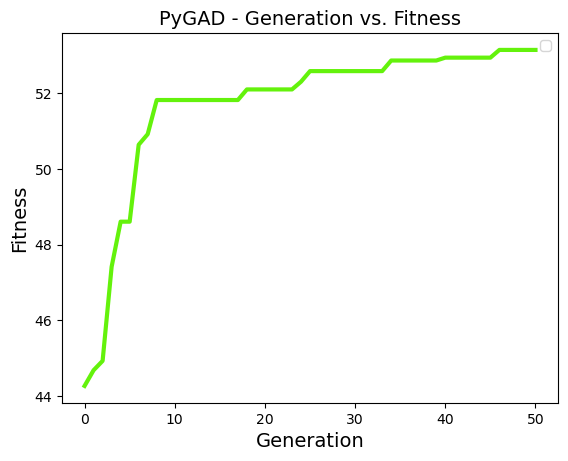

Day: 6
Operation cost: 10
Inicial value: 10103.496641161584
Current value: 10075.849027752623
Actions Investment: [ 0  0  0  0 19  0  0  0  0  0  0  0  0  0  0 19  0  0  0  0  0  0  0  0
  0  0 18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0 18 17  0]
Invested Money: 4685.55
Total Return: -0.27%
Return on Investment: -0.59%
Risk-Adjusted Return: -8.28%

Generation 1 complete
Fitness of the best solution: 25.089907630381127
Generation 2 complete
Fitness of the best solution: 25.645682047491093
Generation 3 complete
Fitness of the best solution: 26.323438789323284
Generation 4 complete
Fitness of the best solution: 26.464030417495977
Generation 5 complete
Fitness of the best solution: 26.893561431008322
Generation 6 complete
Fitness of the best solution: 28.06536938511436
Generation 7 complete
Fitness of the best solution: 28.06536938511436
Generation 8 complete
Fitness of the best solution: 28.06536938511436
Generation 9 complete
Fitness of the best soluti

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


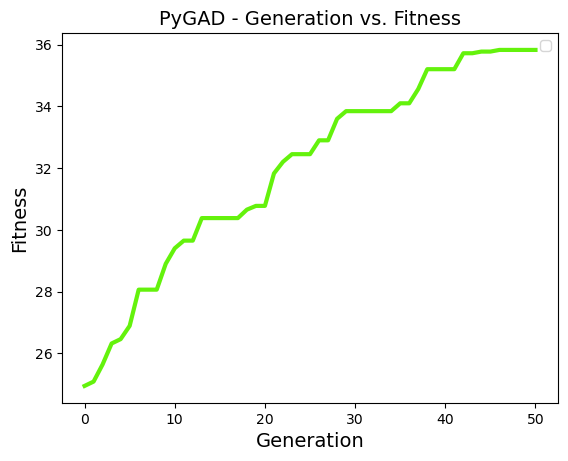

Day: 7
Operation cost: 10
Inicial value: 10075.849027752623
Current value: 10123.741326145677
Actions Investment: [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 17  7  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 17  0  0  0  0  0  0 18
 18  0  0  0  0  0  0]
Invested Money: 4805.55
Total Return: 0.48%
Return on Investment: 1.00%
Risk-Adjusted Return: 13.57%

Generation 1 complete
Fitness of the best solution: 26.143663593252086
Generation 2 complete
Fitness of the best solution: 27.053454722276598
Generation 3 complete
Fitness of the best solution: 27.053454722276598
Generation 4 complete
Fitness of the best solution: 27.6288770567936
Generation 5 complete
Fitness of the best solution: 27.974114009812745
Generation 6 complete
Fitness of the best solution: 28.660031246140875
Generation 7 complete
Fitness of the best solution: 28.912260881035138
Generation 8 complete
Fitness of the best solution: 28.912260881035138
Generation 9 complete
Fitness of the best solutio

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


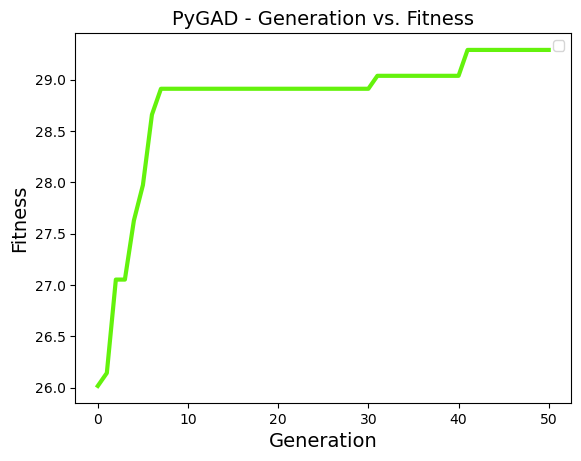

Day: 8
Operation cost: 8
Inicial value: 10123.741326145677
Current value: 10098.607371334563
Actions Investment: [ 0  0  0  0  0  0 18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0 18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0 18  0 19  0]
Invested Money: 3223.04
Total Return: -0.25%
Return on Investment: -0.78%
Risk-Adjusted Return: -7.23%

Generation 1 complete
Fitness of the best solution: 123.0567265303998
Generation 2 complete
Fitness of the best solution: 131.01171936240718
Generation 3 complete
Fitness of the best solution: 131.01171936240718
Generation 4 complete
Fitness of the best solution: 131.01171936240718
Generation 5 complete
Fitness of the best solution: 131.01171936240718
Generation 6 complete
Fitness of the best solution: 131.01171936240718
Generation 7 complete
Fitness of the best solution: 131.29065543268322
Generation 8 complete
Fitness of the best solution: 131.29065543268322
Generation 9 complete
Fitness of the best solut

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


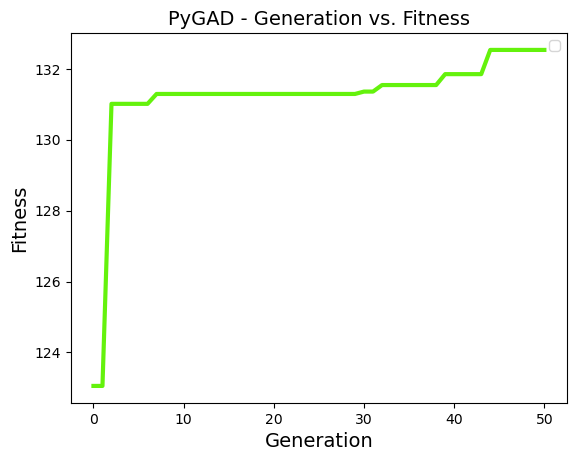

Day: 9
Operation cost: 10
Inicial value: 10098.607371334563
Current value: 10107.916738816157
Actions Investment: [ 0  0  0  9  0  8  0  0  0  0  0  0  0  0 15  0  0  0  0  0  0 13  0  0
  0  0  0  0  0  0 17  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0]
Invested Money: 9580.04
Total Return: 0.09%
Return on Investment: 0.10%
Risk-Adjusted Return: 2.10%

Generation 1 complete
Fitness of the best solution: 144.92575920462212
Generation 2 complete
Fitness of the best solution: 144.92575920462212
Generation 3 complete
Fitness of the best solution: 144.92575920462212
Generation 4 complete
Fitness of the best solution: 146.06582924355519
Generation 5 complete
Fitness of the best solution: 146.09842708490626
Generation 6 complete
Fitness of the best solution: 155.29106921327372
Generation 7 complete
Fitness of the best solution: 156.21463899441378
Generation 8 complete
Fitness of the best solution: 158.74707755943732
Generation 9 complete
Fitness of the best soluti

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


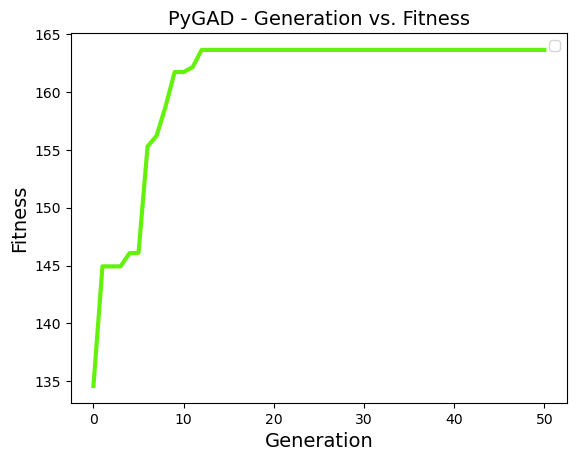

Day: 10
Operation cost: 8
Inicial value: 10107.916738816157
Current value: 10204.163054368404
Actions Investment: [ 0  0  0 17  0  0  0  0  0  0  0  0  0  0  5  0  0  0  0  0  0 16  0  0
  0  0  0  0  0  0  0 10  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0]
Invested Money: 10105.44
Total Return: 0.95%
Return on Investment: 0.95%
Risk-Adjusted Return: 22.15%

Generation 1 complete
Fitness of the best solution: 24.061553525686307
Generation 2 complete
Fitness of the best solution: 24.061553525686307
Generation 3 complete
Fitness of the best solution: 24.061553525686307
Generation 4 complete
Fitness of the best solution: 24.566868620952732
Generation 5 complete
Fitness of the best solution: 25.373285893595437
Generation 6 complete
Fitness of the best solution: 27.38161861917743
Generation 7 complete
Fitness of the best solution: 27.476014622097736
Generation 8 complete
Fitness of the best solution: 27.476014622097736
Generation 9 complete
Fitness of the best solut

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


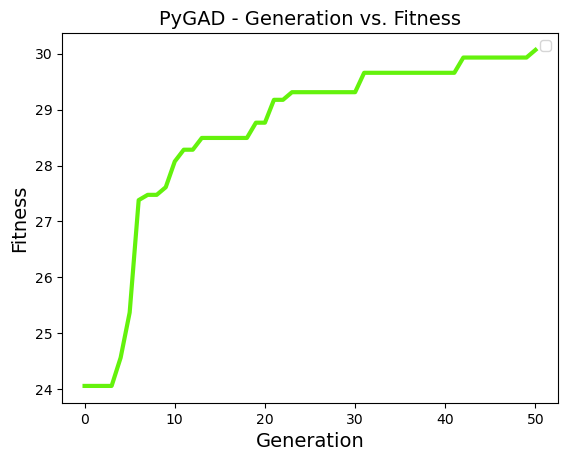

Day: 11
Operation cost: 10
Inicial value: 10204.163054368404
Current value: 10224.707846173937
Actions Investment: [ 0  0  0  0 14  0  0  0  0  0  0  0  0  0 19 18  0  0  0 19  0  0  0  0
  0  0  0 18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0]
Invested Money: 4843.06
Total Return: 0.20%
Return on Investment: 0.42%
Risk-Adjusted Return: 4.26%

Generation 1 complete
Fitness of the best solution: 12.2244320366828
Generation 2 complete
Fitness of the best solution: 12.820724067721528
Generation 3 complete
Fitness of the best solution: 13.054857433453236
Generation 4 complete
Fitness of the best solution: 14.002349513089527
Generation 5 complete
Fitness of the best solution: 14.002349513089527
Generation 6 complete
Fitness of the best solution: 14.002349513089527
Generation 7 complete
Fitness of the best solution: 14.002349513089527
Generation 8 complete
Fitness of the best solution: 14.002349513089527
Generation 9 complete
Fitness of the best solutio

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


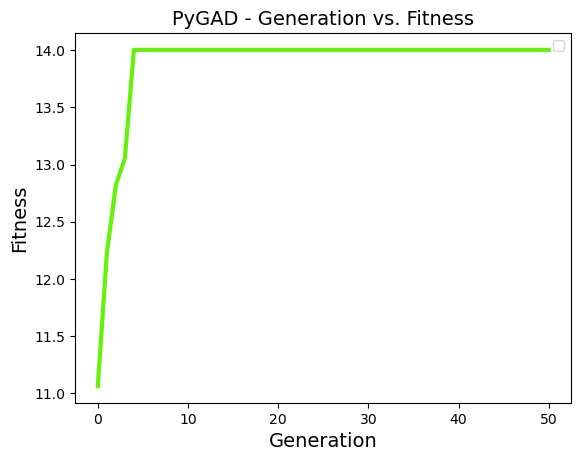

Day: 12
Operation cost: 4
Inicial value: 10224.707846173937
Current value: 10222.659476874032
Actions Investment: [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 19  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0 18  0]
Invested Money: 2269.13
Total Return: -0.02%
Return on Investment: -0.09%
Risk-Adjusted Return: -0.63%

Generation 1 complete
Fitness of the best solution: 22.561607969216496
Generation 2 complete
Fitness of the best solution: 22.561607969216496
Generation 3 complete
Fitness of the best solution: 23.81266603382427
Generation 4 complete
Fitness of the best solution: 23.978563160071786
Generation 5 complete
Fitness of the best solution: 24.399857495465824
Generation 6 complete
Fitness of the best solution: 24.69405170368939
Generation 7 complete
Fitness of the best solution: 24.69405170368939
Generation 8 complete
Fitness of the best solution: 25.14066906670407
Generation 9 complete
Fitness of the best solutio

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


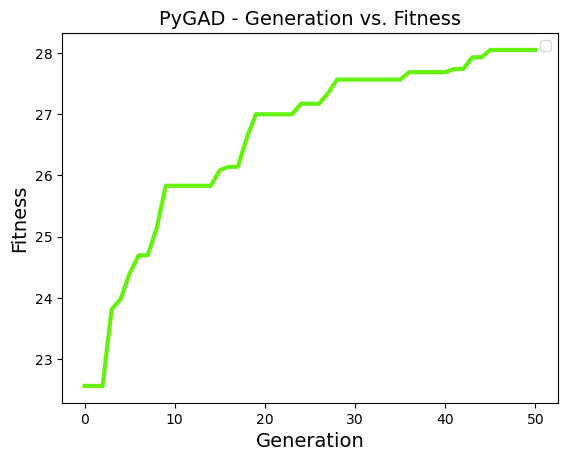

Day: 13
Operation cost: 10
Inicial value: 10222.659476874032
Current value: 10205.238018465072
Actions Investment: [ 0  0  0  0  0  0  0  0  0  0 14  0 16  0  0  0  0 19  0 19  0  0  0  0
  0  0  0  0 14  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0]
Invested Money: 5941.30
Total Return: -0.17%
Return on Investment: -0.29%
Risk-Adjusted Return: -3.71%

Generation 1 complete
Fitness of the best solution: 33.99023264562717
Generation 2 complete
Fitness of the best solution: 33.99023264562717
Generation 3 complete
Fitness of the best solution: 33.99023264562717
Generation 4 complete
Fitness of the best solution: 34.32366060882916
Generation 5 complete
Fitness of the best solution: 34.41165374237408
Generation 6 complete
Fitness of the best solution: 36.470511126707756
Generation 7 complete
Fitness of the best solution: 38.460793306282575
Generation 8 complete
Fitness of the best solution: 39.6610923187792
Generation 9 complete
Fitness of the best solution:

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


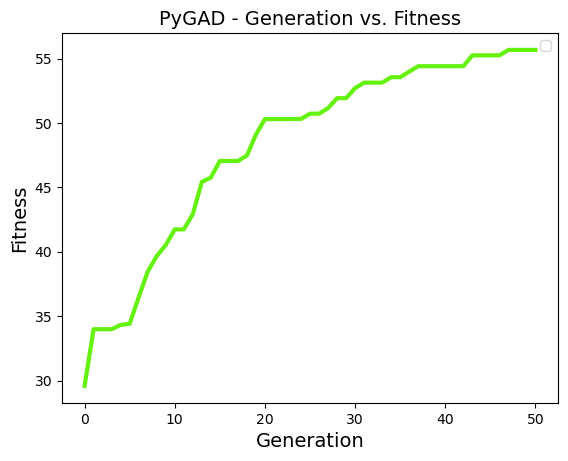

Day: 14
Operation cost: 8
Inicial value: 10205.238018465072
Current value: 10204.562301046464
Actions Investment: [ 0  0  0  0  0 19  0  0  0  0 18  0  0  0  0  0  0 19  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0 19  0]
Invested Money: 5721.55
Total Return: -0.01%
Return on Investment: -0.01%
Risk-Adjusted Return: -0.33%

Generation 1 complete
Fitness of the best solution: 14.350582799724464
Generation 2 complete
Fitness of the best solution: 20.38981525255201
Generation 3 complete
Fitness of the best solution: 20.824352028563574
Generation 4 complete
Fitness of the best solution: 21.212453798254124
Generation 5 complete
Fitness of the best solution: 21.444915801539437
Generation 6 complete
Fitness of the best solution: 21.69482383237537
Generation 7 complete
Fitness of the best solution: 21.69482383237537
Generation 8 complete
Fitness of the best solution: 22.221386842411782
Generation 9 complete
Fitness of the best soluti

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


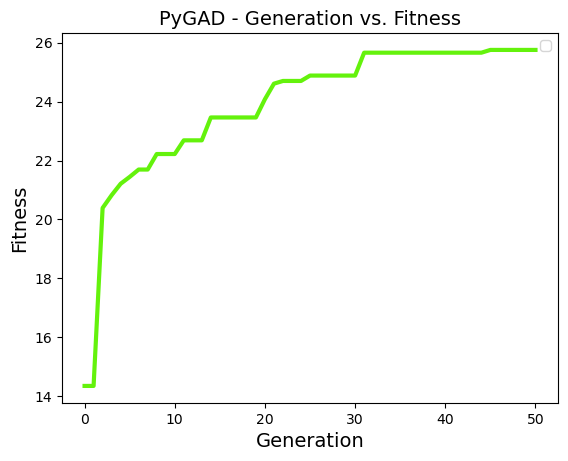

Day: 15
Operation cost: 10
Inicial value: 10204.562301046464
Current value: 10077.456530415542
Actions Investment: [ 0  0  0  0  0  0  0  0  0  0 19  0  0  0  0  0  0 19  0 19  0  9  0  0
  0  0  0  0  0  0 16  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0]
Invested Money: 9726.84
Total Return: -1.25%
Return on Investment: -1.31%
Risk-Adjusted Return: -24.93%

Generation 1 complete
Fitness of the best solution: 108.26963982479386
Generation 2 complete
Fitness of the best solution: 108.52163829891495
Generation 3 complete
Fitness of the best solution: 114.31060695206061
Generation 4 complete
Fitness of the best solution: 114.31060695206061
Generation 5 complete
Fitness of the best solution: 114.31060695206061
Generation 6 complete
Fitness of the best solution: 114.95767972797076
Generation 7 complete
Fitness of the best solution: 115.47368216937701
Generation 8 complete
Fitness of the best solution: 116.32511399306006
Generation 9 complete
Fitness of the best s

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


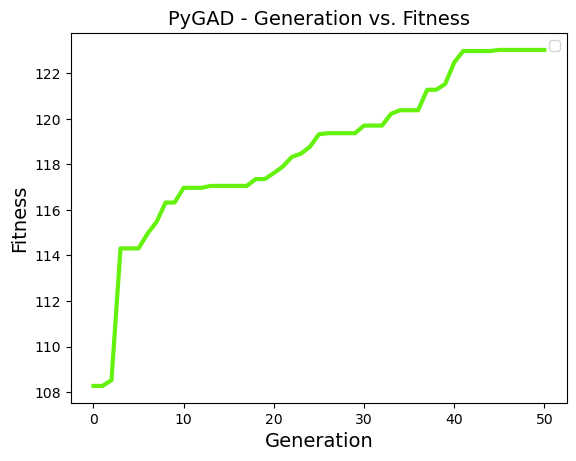

Day: 16
Operation cost: 10
Inicial value: 10077.456530415542
Current value: 10106.290570952413
Actions Investment: [ 0  0  0  0  0  0  0  0  0  0 14 19 19  0  0  0  0  5  0  0  0  0  0  0
  0  0  0  0  0  0 18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0]
Invested Money: 7659.58
Total Return: 0.29%
Return on Investment: 0.38%
Risk-Adjusted Return: 5.51%

Generation 1 complete
Fitness of the best solution: 0.0
Generation 2 complete
Fitness of the best solution: 0.0
Generation 3 complete
Fitness of the best solution: 0.0
Generation 4 complete
Fitness of the best solution: 0.0
Generation 5 complete
Fitness of the best solution: 0.0
Generation 6 complete
Fitness of the best solution: 0.0
Generation 7 complete
Fitness of the best solution: 0.0
Generation 8 complete
Fitness of the best solution: 0.0
Generation 9 complete
Fitness of the best solution: 0.0
Generation 10 complete
Fitness of the best solution: 0.0
Generation 11 complete
Fitness of the best solution: 0

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


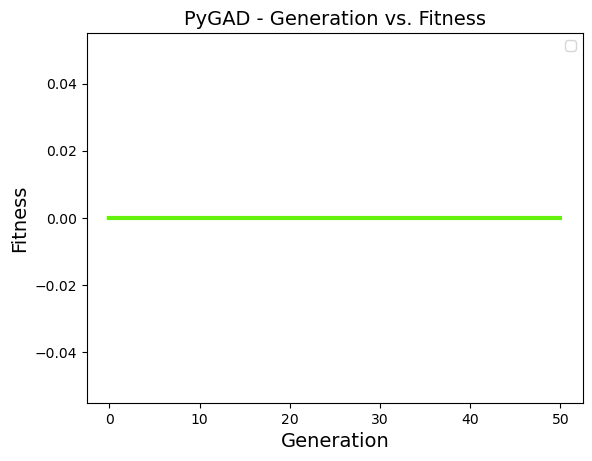

C:\Users\Utilizador\AppData\Local\Temp\ipykernel_2276\1674741665.py:2: RuntimeWarning: invalid value encountered in scalar divide
  return ((earnings - investment)/investment)*100


Day: 17
Operation cost: 0
Inicial value: 10106.290570952413
Current value: 10106.290570952413
Actions Investment: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Invested Money: 0.00
Total Return: 0.00%
Return on Investment: nan%
Risk-Adjusted Return: -0.19%

Generation 1 complete
Fitness of the best solution: 86.47604049345338
Generation 2 complete
Fitness of the best solution: 86.47604049345338
Generation 3 complete
Fitness of the best solution: 86.91914692942174
Generation 4 complete
Fitness of the best solution: 89.31438344441784
Generation 5 complete
Fitness of the best solution: 93.87183536987943
Generation 6 complete
Fitness of the best solution: 93.87183536987943
Generation 7 complete
Fitness of the best solution: 96.04126863221667
Generation 8 complete
Fitness of the best solution: 98.07678782134808
Generation 9 complete
Fitness of the best solution: 98.07678782134808
Generation 10 complete
Fitness of the best so

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


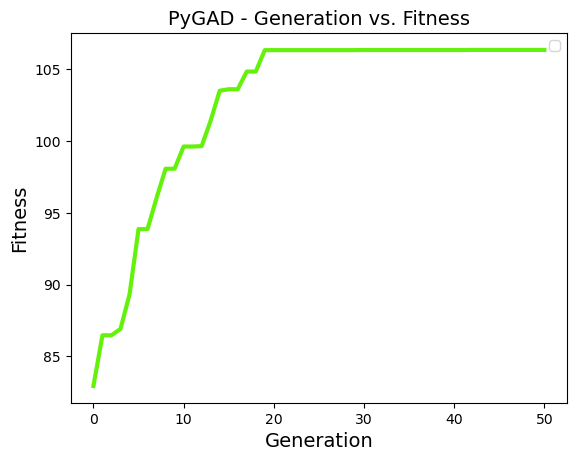

Day: 18
Operation cost: 10
Inicial value: 10106.290570952413
Current value: 10189.202425347084
Actions Investment: [ 0  0  0 19  0  0  0  0  0  0  0 19  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0 19  0 18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0 16  0]
Invested Money: 8579.52
Total Return: 0.82%
Return on Investment: 0.97%
Risk-Adjusted Return: 16.99%

Generation 1 complete
Fitness of the best solution: 23.578750756139556
Generation 2 complete
Fitness of the best solution: 23.666359583264075
Generation 3 complete
Fitness of the best solution: 24.43484625423355
Generation 4 complete
Fitness of the best solution: 24.58560373662047
Generation 5 complete
Fitness of the best solution: 25.568554602791536
Generation 6 complete
Fitness of the best solution: 26.591127665409346
Generation 7 complete
Fitness of the best solution: 26.850655351083503
Generation 8 complete
Fitness of the best solution: 26.850655351083503
Generation 9 complete
Fitness of the best soluti

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


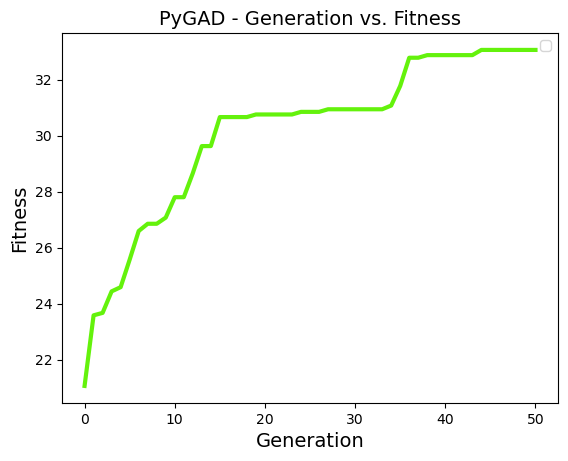

Day: 19
Operation cost: 10
Inicial value: 10189.202425347084
Current value: 10167.223765352406
Actions Investment: [ 0  0  0 19  1  0  0  0  0  0  0  0  0  0  0  0  0 17  0 18  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0 19  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0]
Invested Money: 6898.72
Total Return: -0.22%
Return on Investment: -0.32%
Risk-Adjusted Return: -4.90%

Generation 1 complete
Fitness of the best solution: 148.22013724787337
Generation 2 complete
Fitness of the best solution: 175.30345865211234
Generation 3 complete
Fitness of the best solution: 177.1014595676397
Generation 4 complete
Fitness of the best solution: 187.44442935523733
Generation 5 complete
Fitness of the best solution: 187.44442935523733
Generation 6 complete
Fitness of the best solution: 190.76418561207745
Generation 7 complete
Fitness of the best solution: 191.07949236787903
Generation 8 complete
Fitness of the best solution: 192.00396567262857
Generation 9 complete
Fitness of the best sol

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


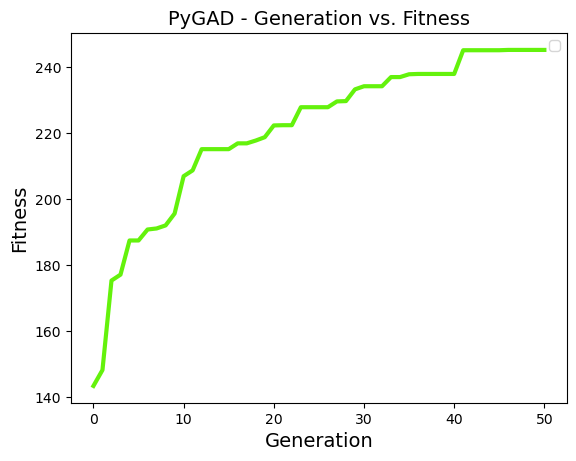

Day: 20
Operation cost: 10
Inicial value: 10167.223765352406
Current value: 10007.968861290785
Actions Investment: [19  0  0  0  0 19  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0 10  0  0  0  0  0  0  0  0  0  0  0  0  5  0  0  0  0  0  0
  0 19  0  0  0  0  0]
Invested Money: 9940.35
Total Return: -1.57%
Return on Investment: -1.60%
Risk-Adjusted Return: -34.99%



In [550]:
for i in range (0, 21):
    day = i
    daily_investment()

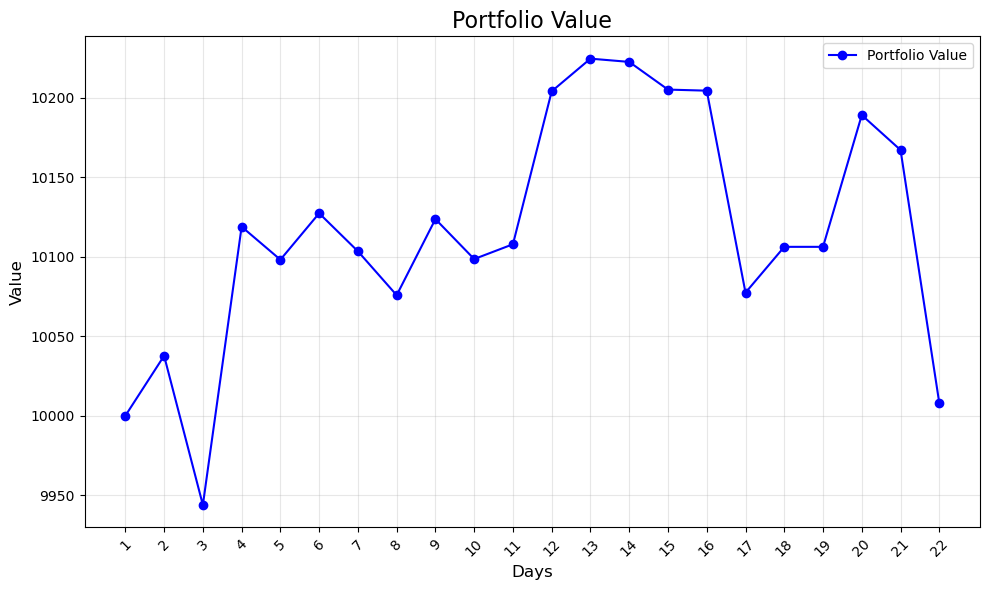

In [555]:
dias = np.arange(1, 23)
plt.figure(figsize=(10, 6))
plt.plot(dias, values, marker='o', linestyle='-', color='b', label='Portfolio Value')
plt.title('Portfolio Value', fontsize=16)
plt.xlabel('Days', fontsize=12)
plt.ylabel('Value', fontsize=12)
plt.xticks(ticks=dias, rotation=45)
plt.grid(alpha=0.3) 
plt.legend()  

plt.tight_layout() 
plt.show()

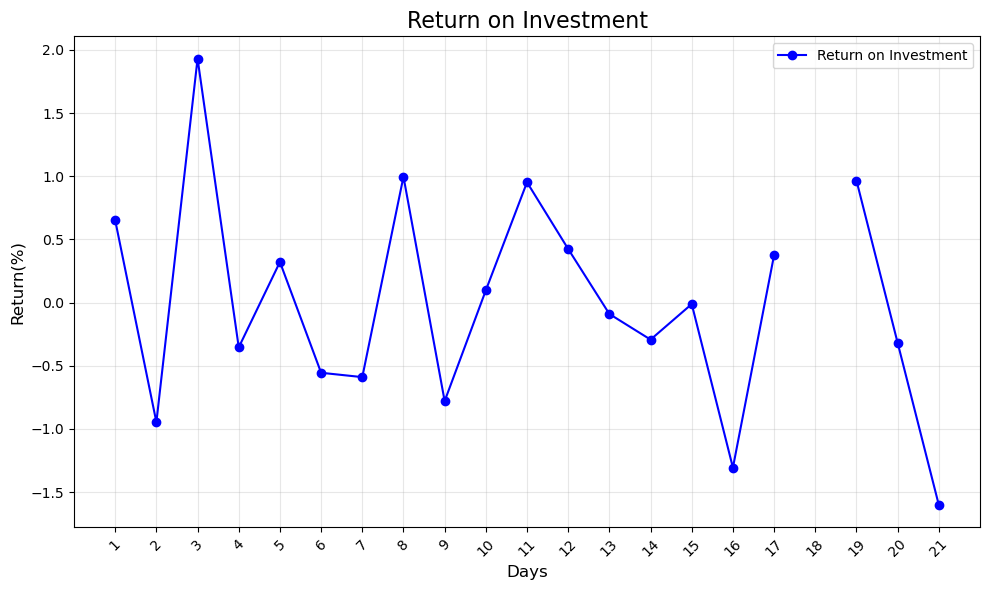

In [559]:
dias = np.arange(1, 22)
plt.figure(figsize=(10, 6))
plt.plot(dias, returns, marker='o', linestyle='-', color='b', label='Return on Investment')
plt.title('Return on Investment', fontsize=16)
plt.xlabel('Days', fontsize=12)
plt.ylabel('Return(%)', fontsize=12)
plt.xticks(ticks=dias, rotation=45)
plt.grid(alpha=0.3) 
plt.legend()  

plt.tight_layout() 
plt.show()

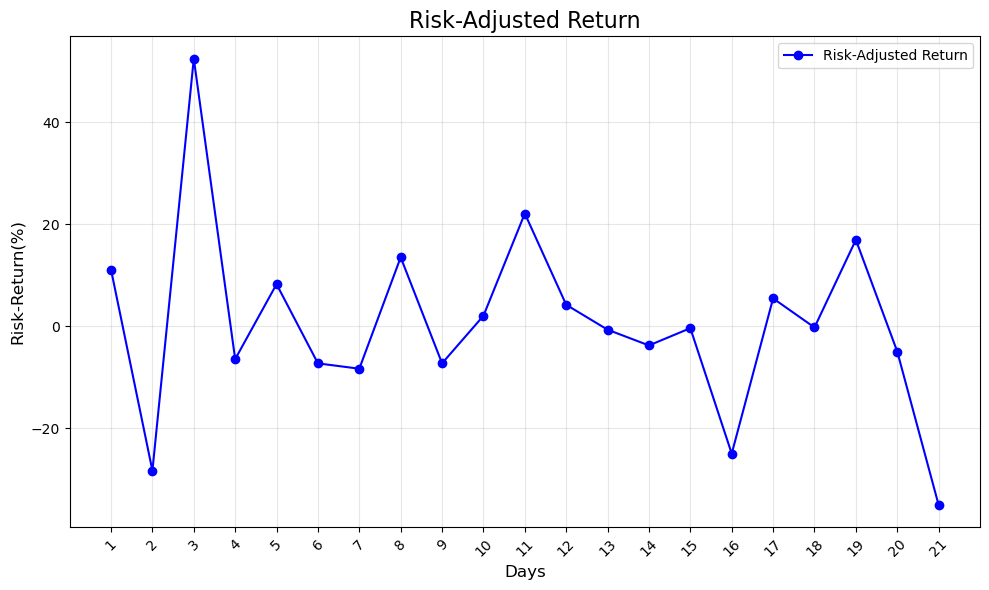

In [561]:
dias = np.arange(1, 22)
plt.figure(figsize=(10, 6))
plt.plot(dias, risk_returns, marker='o', linestyle='-', color='b', label='Risk-Adjusted Return')
plt.title('Risk-Adjusted Return', fontsize=16)
plt.xlabel('Days', fontsize=12)
plt.ylabel('Risk-Return(%)', fontsize=12)
plt.xticks(ticks=dias, rotation=45)
plt.grid(alpha=0.3) 
plt.legend()  

plt.tight_layout() 
plt.show()

Referências:  
https://www.digitalocean.com/community/tutorials/genetic-algorithm-applications-using-pygad  